# Food Desert Investigation -- Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('new_clean_combined.csv')

In [3]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,...,HS_GED,Bachelors,Employed,Unemployed,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months,PovertyEstimateAllAges,PovertyPercentAllAges,MedianHouseholdIncome
0,1001,AL,autauga,59447.5,31,44,31,3,525930.9601,32.910876,...,157666,36853,162504,50774,46257.0,64632.0,37.8,7444.0,13.5,54487.0
1,1003,AL,baldwin,59447.5,118,156,236,29,525930.9601,32.910876,...,157666,36853,162504,50774,46257.0,64632.0,37.8,24005.0,11.7,56460.0
2,1005,AL,barbour,59447.5,19,23,14,4,525930.9601,32.910876,...,157666,36853,162504,50774,46257.0,64632.0,37.8,6787.0,29.9,32884.0
3,1007,AL,bibb,59447.5,15,7,7,5,525930.9601,32.910876,...,157666,36853,162504,50774,46257.0,64632.0,37.8,4099.0,20.1,43079.0
4,1009,AL,blount,59447.5,27,23,12,5,525930.9601,32.910876,...,157666,36853,162504,50774,46257.0,64632.0,37.8,8033.0,14.1,47213.0


In [4]:
df.describe()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,HS_GED,Bachelors,Employed,Unemployed,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months,PovertyEstimateAllAges,PovertyPercentAllAges,MedianHouseholdIncome
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.00000,3140.000000,67.000000,67.000000,67.000000
mean,30387.632484,129608.522452,40.391083,75.765924,78.621975,20.821975,8.842030e+05,26.956769,2.785856,10.817834,...,217874.274841,77881.733121,2.863513e+05,76484.606688,55319.004777,75732.01242,34.382994,12152.089552,20.656716,40636.447761
std,15156.372045,154721.098857,97.056911,268.964930,270.112658,90.238333,9.003237e+05,4.398413,0.582904,37.001812,...,189556.269947,84311.266970,2.866946e+05,70111.448002,7743.317417,10110.03324,2.338979,16299.113975,6.113825,8632.608783
min,1001.000000,7532.750000,0.000000,0.000000,0.000000,0.000000,4.845020e+04,16.722382,1.237415,0.000000,...,12791.000000,3686.000000,1.485200e+04,4139.000000,41754.000000,58974.00000,28.900000,1801.000000,7.900000,24216.000000
25%,18178.500000,43433.750000,7.000000,5.000000,7.000000,2.000000,3.767442e+05,23.859642,2.379881,0.000000,...,85786.000000,23605.000000,1.029990e+05,26868.000000,50584.000000,69308.00000,33.000000,3997.000000,17.150000,35395.000000
50%,29176.000000,71045.000000,15.000000,15.000000,18.000000,5.000000,5.986653e+05,26.713016,2.689100,2.000000,...,158470.000000,44745.000000,1.916300e+05,51769.000000,54467.000000,73644.00000,34.100000,7228.000000,19.400000,39530.000000
75%,45079.500000,127954.500000,35.250000,45.000000,48.250000,12.000000,1.013673e+06,30.887988,3.065642,6.000000,...,286946.000000,88578.000000,3.479850e+05,109218.000000,57532.000000,80346.00000,35.800000,13418.000000,23.500000,44156.000000
max,56045.000000,595088.250000,2199.000000,8264.000000,8113.000000,2495.000000,3.377166e+06,35.633484,4.030984,939.000000,...,773071.000000,439167.000000,1.233501e+06,353021.000000,78945.000000,114432.00000,40.500000,98463.000000,35.400000,74212.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FIPS                              3140 non-null   int64  
 1   State                             3140 non-null   object 
 2   County                            3140 non-null   object 
 3   CACFP_PART_2016                   3140 non-null   float64
 4   CONVS16                           3140 non-null   int64  
 5   FFR16                             3140 non-null   int64  
 6   FSR16                             3140 non-null   int64  
 7   GROC16                            3140 non-null   int64  
 8   NSLP_PART_2016                    3140 non-null   float64
 9   PCT_WICINFANTCHILD16              3140 non-null   float64
 10  PCT_WICWOMEN16                    3140 non-null   float64
 11  RECFAC16                          3140 non-null   int64  
 12  REDEMP

## Dependent Variable

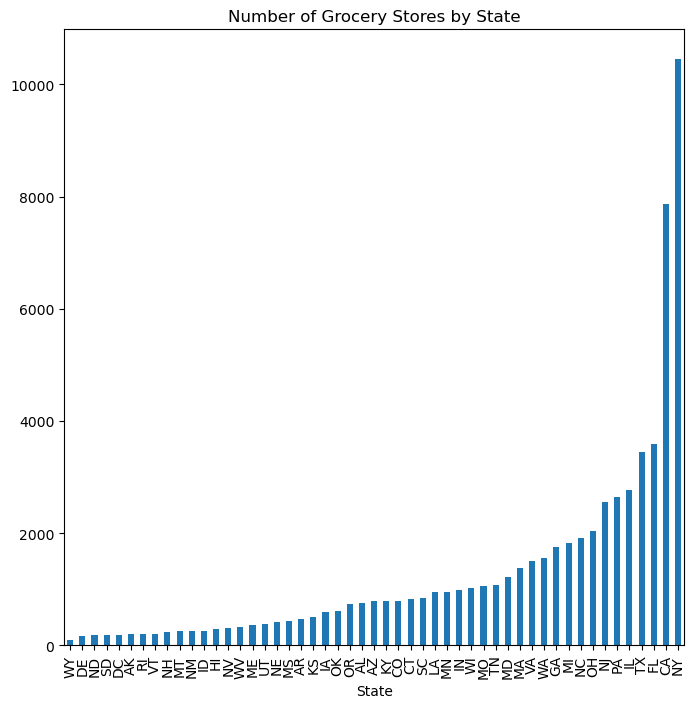

In [6]:
plt.figure(figsize=(8,8))
groc_by_state = df.groupby("State")['GROC16'].sum().sort_values(ascending=True)
groc_by_state.plot(kind="bar", title="Number of Grocery Stores by State")
plt.show()

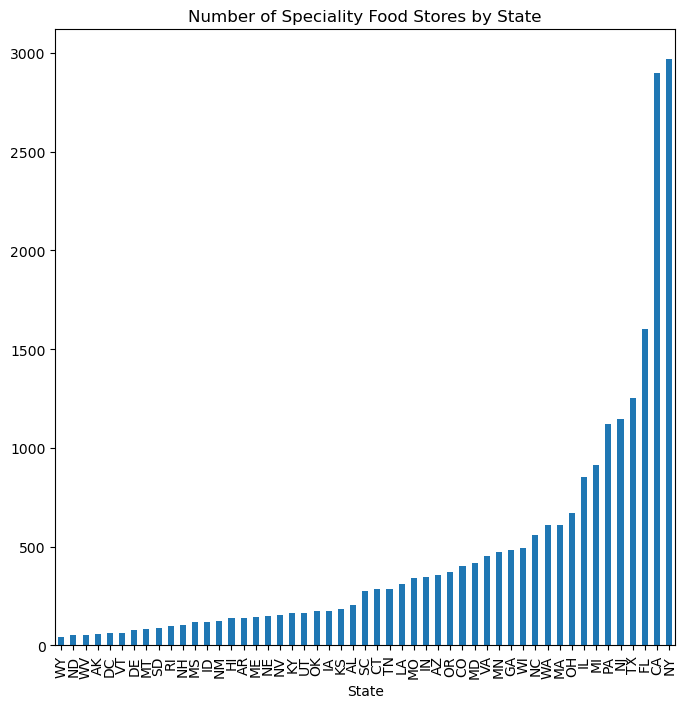

In [7]:
plt.figure(figsize=(8,8))
spec_by_state = df.groupby("State")['SPECS16'].sum().sort_values(ascending=True)
spec_by_state.plot(kind="bar", title="Number of Speciality Food Stores by State")
plt.show()

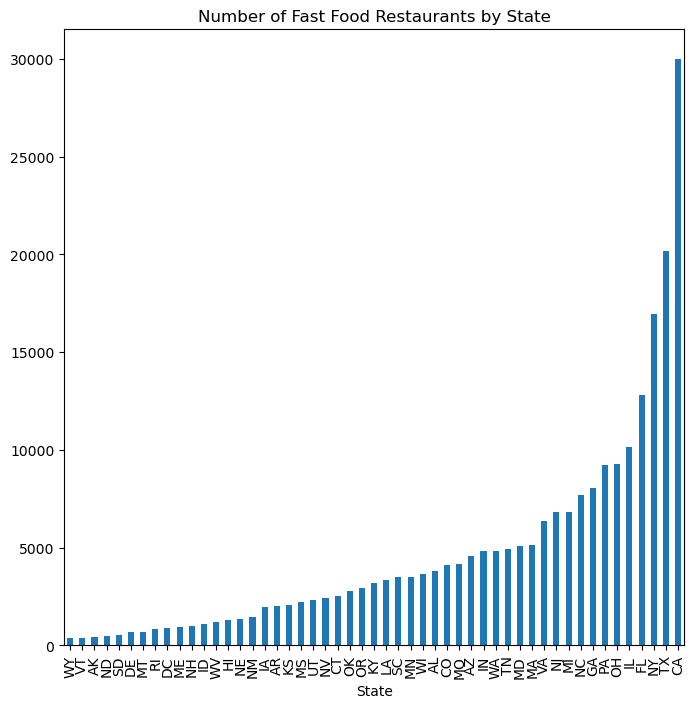

In [8]:
plt.figure(figsize=(8,8))
ff_by_state = df.groupby("State")['FFR16'].sum().sort_values(ascending=True)
ff_by_state.plot(kind="bar", title="Number of Fast Food Restaurants by State")
plt.show()

In [9]:
restaurants_by_state = df.groupby('State')[['FFR16','FSR16']].sum()
restaurants_by_state.head()

,FFR16,FSR16
State,,
AK,421,578
AL,3822,2821
AR,2014,2015
AZ,4585,4157
CA,29995,30798


<Figure size 2000x2000 with 0 Axes>

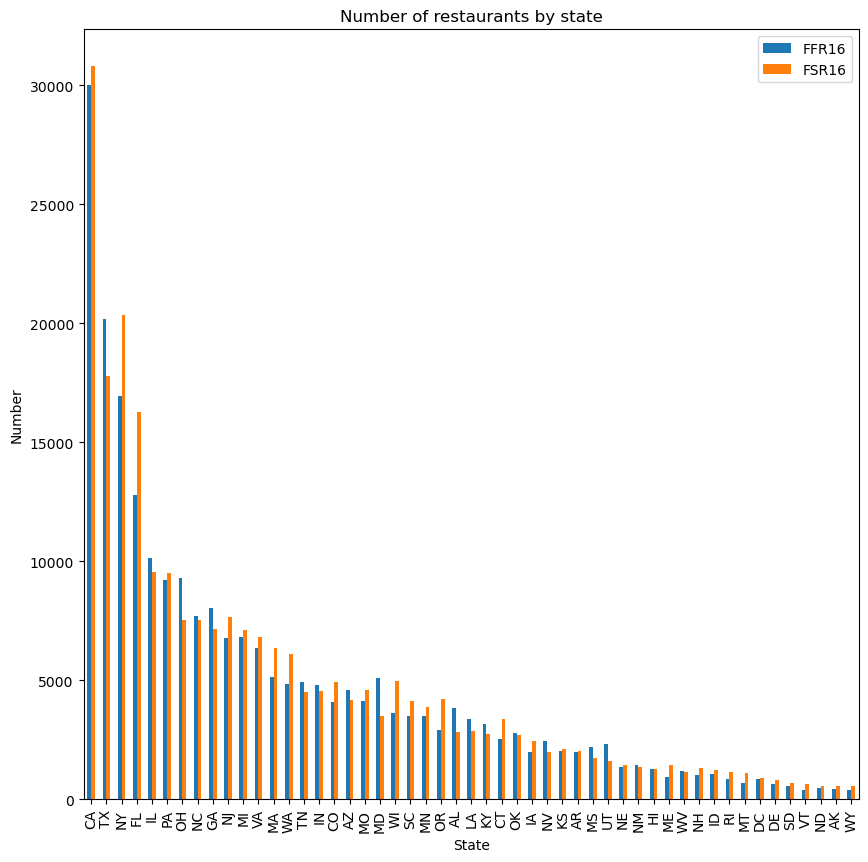

In [10]:
plt.figure(figsize=(20,20))
(restaurants_by_state.reindex(index=restaurants_by_state.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of restaurants by state'))
plt.xlabel('State')
plt.ylabel('Number');

In [20]:
corr = df.corr(numeric_only=True)
corr

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,HS_GED,Bachelors,Employed,Unemployed,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months,PovertyEstimateAllAges,PovertyPercentAllAges,MedianHouseholdIncome
FIPS,1.000000,0.138808,-0.039808,-0.050899,-0.051057,-0.034344,0.154191,-0.158109,-0.033347,-0.048643,...,0.073880,0.008266,0.113478,0.025714,0.093256,0.098580,-0.237534,0.163410,0.049234,-0.009175
CACFP_PART_2016,0.138808,1.000000,0.167380,0.160561,0.160835,0.141671,0.987134,0.483234,0.599480,0.146159,...,0.935827,0.920477,0.983043,0.918684,0.163373,0.330321,0.283845,NaN,NaN,NaN
CONVS16,-0.039808,0.167380,1.000000,0.909071,0.869200,0.700631,0.156429,0.119928,0.035911,0.873456,...,0.209714,0.232068,0.182833,0.219181,0.099893,0.148063,0.153454,0.973327,-0.353888,0.483415
FFR16,-0.050899,0.160561,0.909071,1.000000,0.975937,0.835600,0.142968,0.088758,0.008151,0.952760,...,0.185846,0.232445,0.172902,0.212828,0.137329,0.180038,0.119958,0.949205,-0.341169,0.482667
FSR16,-0.051057,0.160835,0.869200,0.975937,1.000000,0.843935,0.138826,0.085256,-0.010093,0.966063,...,0.189239,0.243707,0.172120,0.215502,0.153215,0.199112,0.123790,0.931821,-0.410250,0.559676
GROC16,-0.034344,0.141671,0.700631,0.835600,0.843935,1.000000,0.114454,0.072604,-0.018350,0.778108,...,0.167299,0.217842,0.142680,0.188864,0.138441,0.187157,0.146676,0.961012,-0.336400,0.453785
NSLP_PART_2016,0.154191,0.987134,0.156429,0.142968,0.138826,0.114454,1.000000,0.457460,0.592878,0.126255,...,0.940348,0.897482,0.986737,0.918607,0.142393,0.309513,0.282203,NaN,NaN,NaN
PCT_WICINFANTCHILD16,-0.158109,0.483234,0.119928,0.088758,0.085256,0.072604,0.457460,1.000000,0.831795,0.062911,...,0.517621,0.434470,0.480219,0.492782,-0.471471,-0.349702,0.406040,NaN,NaN,NaN
PCT_WICWOMEN16,-0.033347,0.599480,0.035911,0.008151,-0.010093,-0.018350,0.592878,0.831795,1.000000,-0.030186,...,0.522505,0.401894,0.557047,0.460583,-0.454265,-0.350687,0.345649,NaN,NaN,NaN
RECFAC16,-0.048643,0.146159,0.873456,0.952760,0.966063,0.778108,0.126255,0.062911,-0.030186,1.000000,...,0.172860,0.226384,0.156442,0.198738,0.175848,0.217816,0.117130,0.892762,-0.371507,0.555765


In [12]:
abs_corr = corr.abs()

In [13]:
s = abs_corr.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = so[so > 0.6]
so = so[so < 1.0]

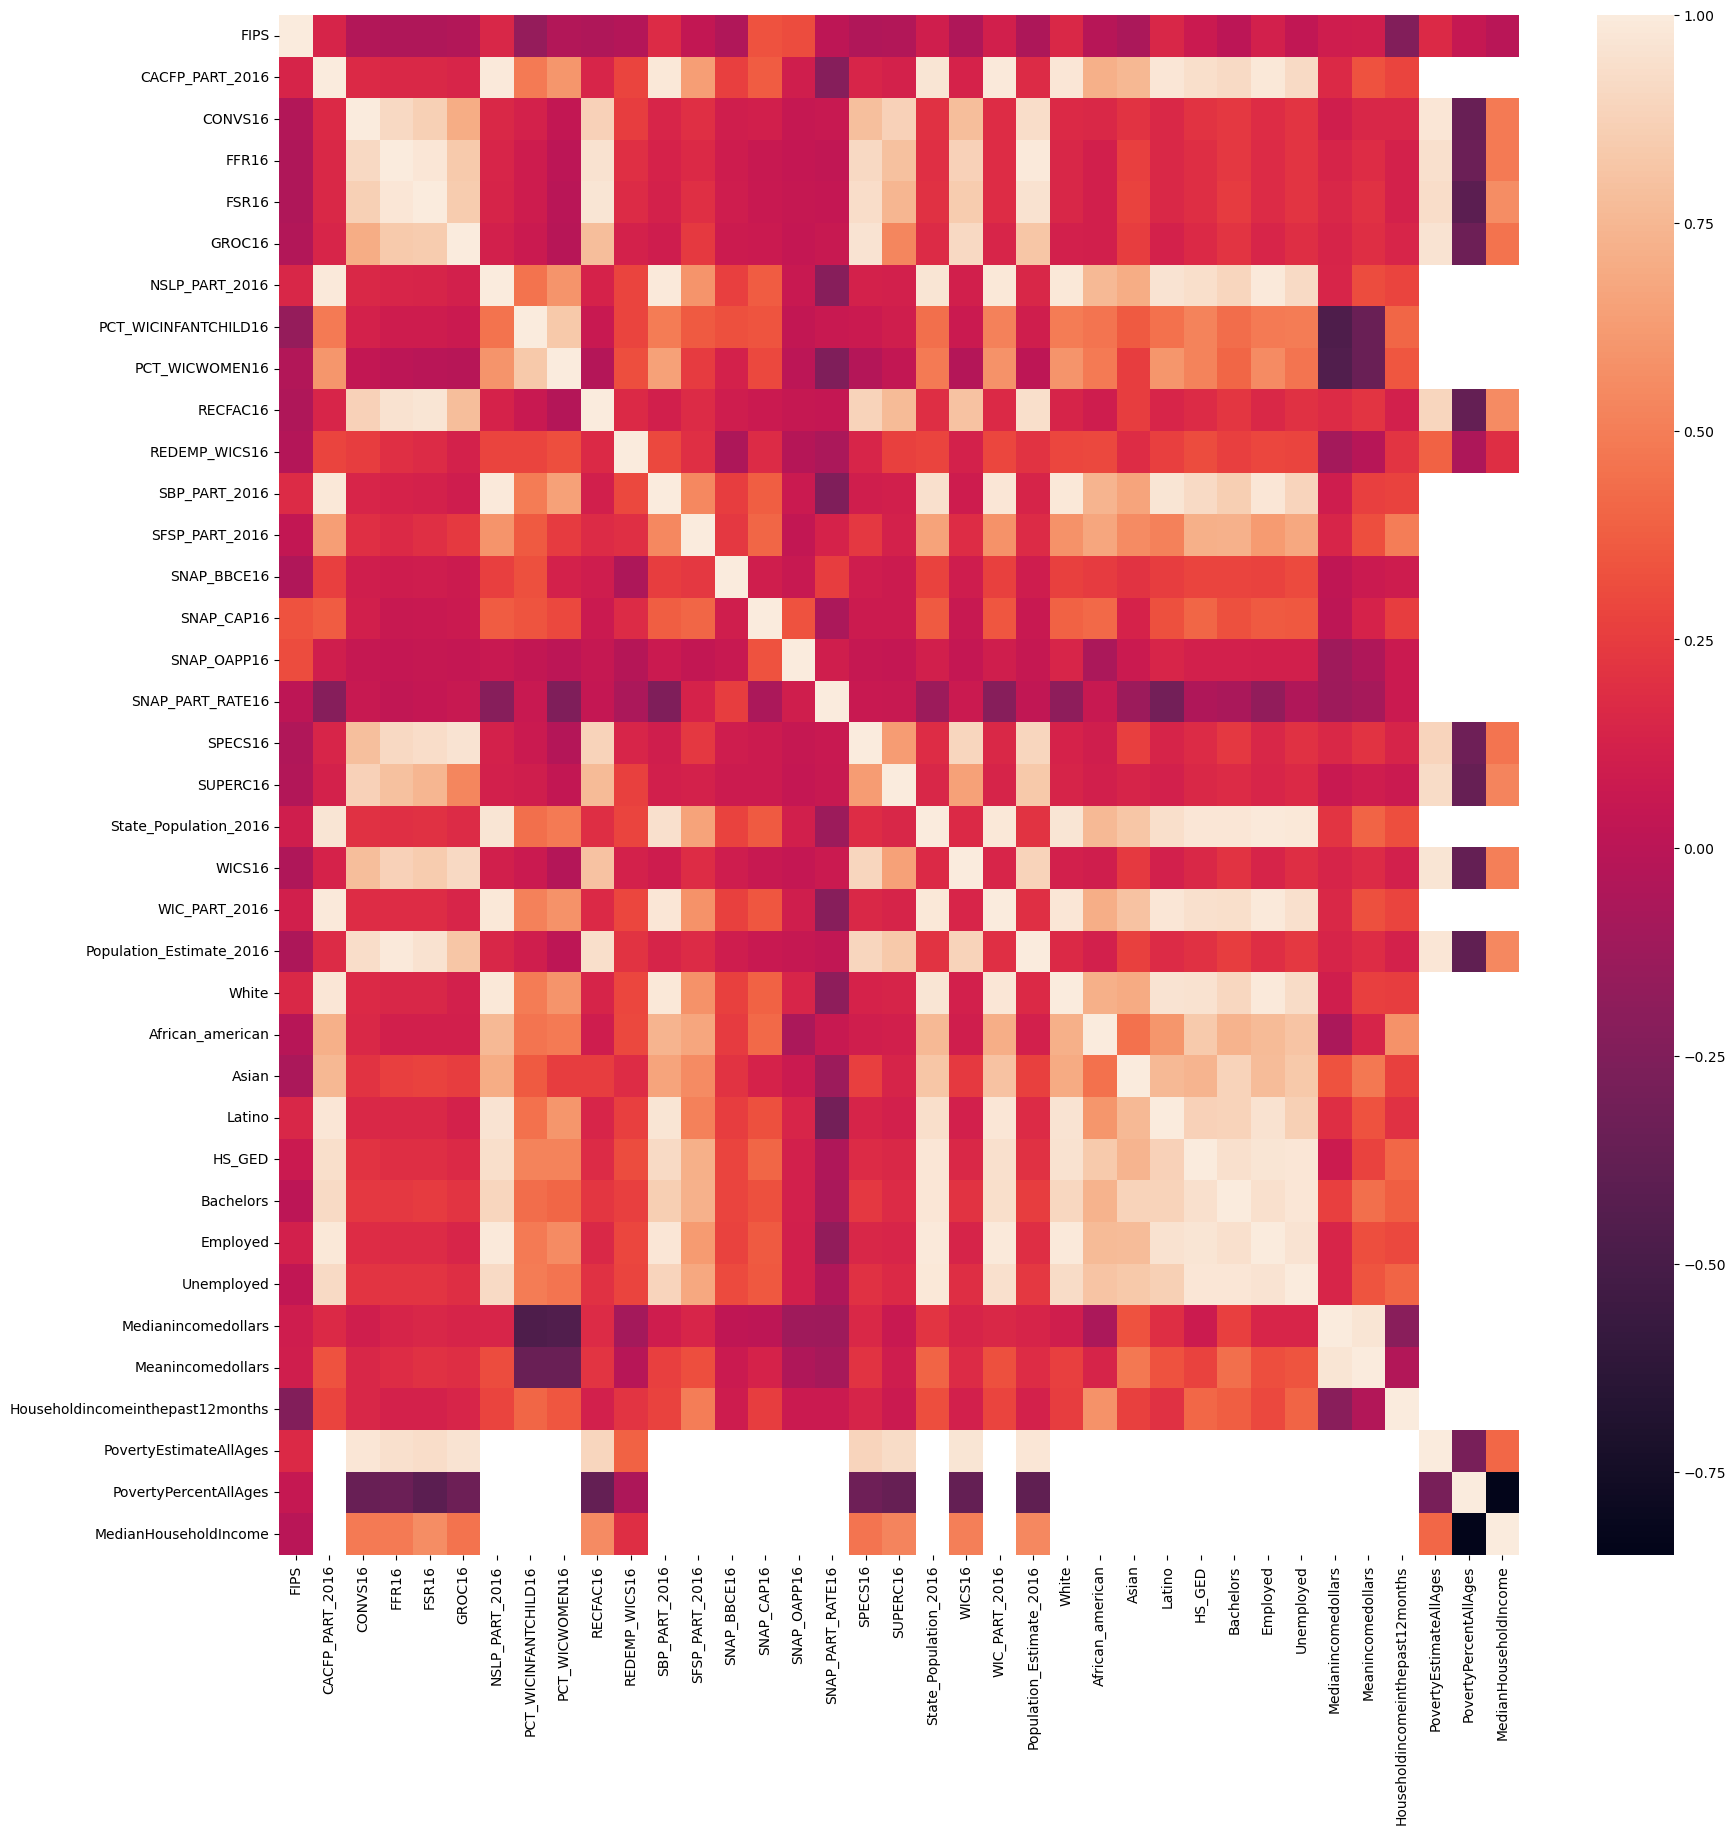

In [14]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

In [15]:
sorted_correlation = pd.DataFrame(so)
sorted_correlation.head()

,,0
SBP_PART_2016,NSLP_PART_2016,0.992469
NSLP_PART_2016,SBP_PART_2016,0.992469
WIC_PART_2016,Employed,0.992069
Employed,WIC_PART_2016,0.992069
State_Population_2016,Employed,0.991725


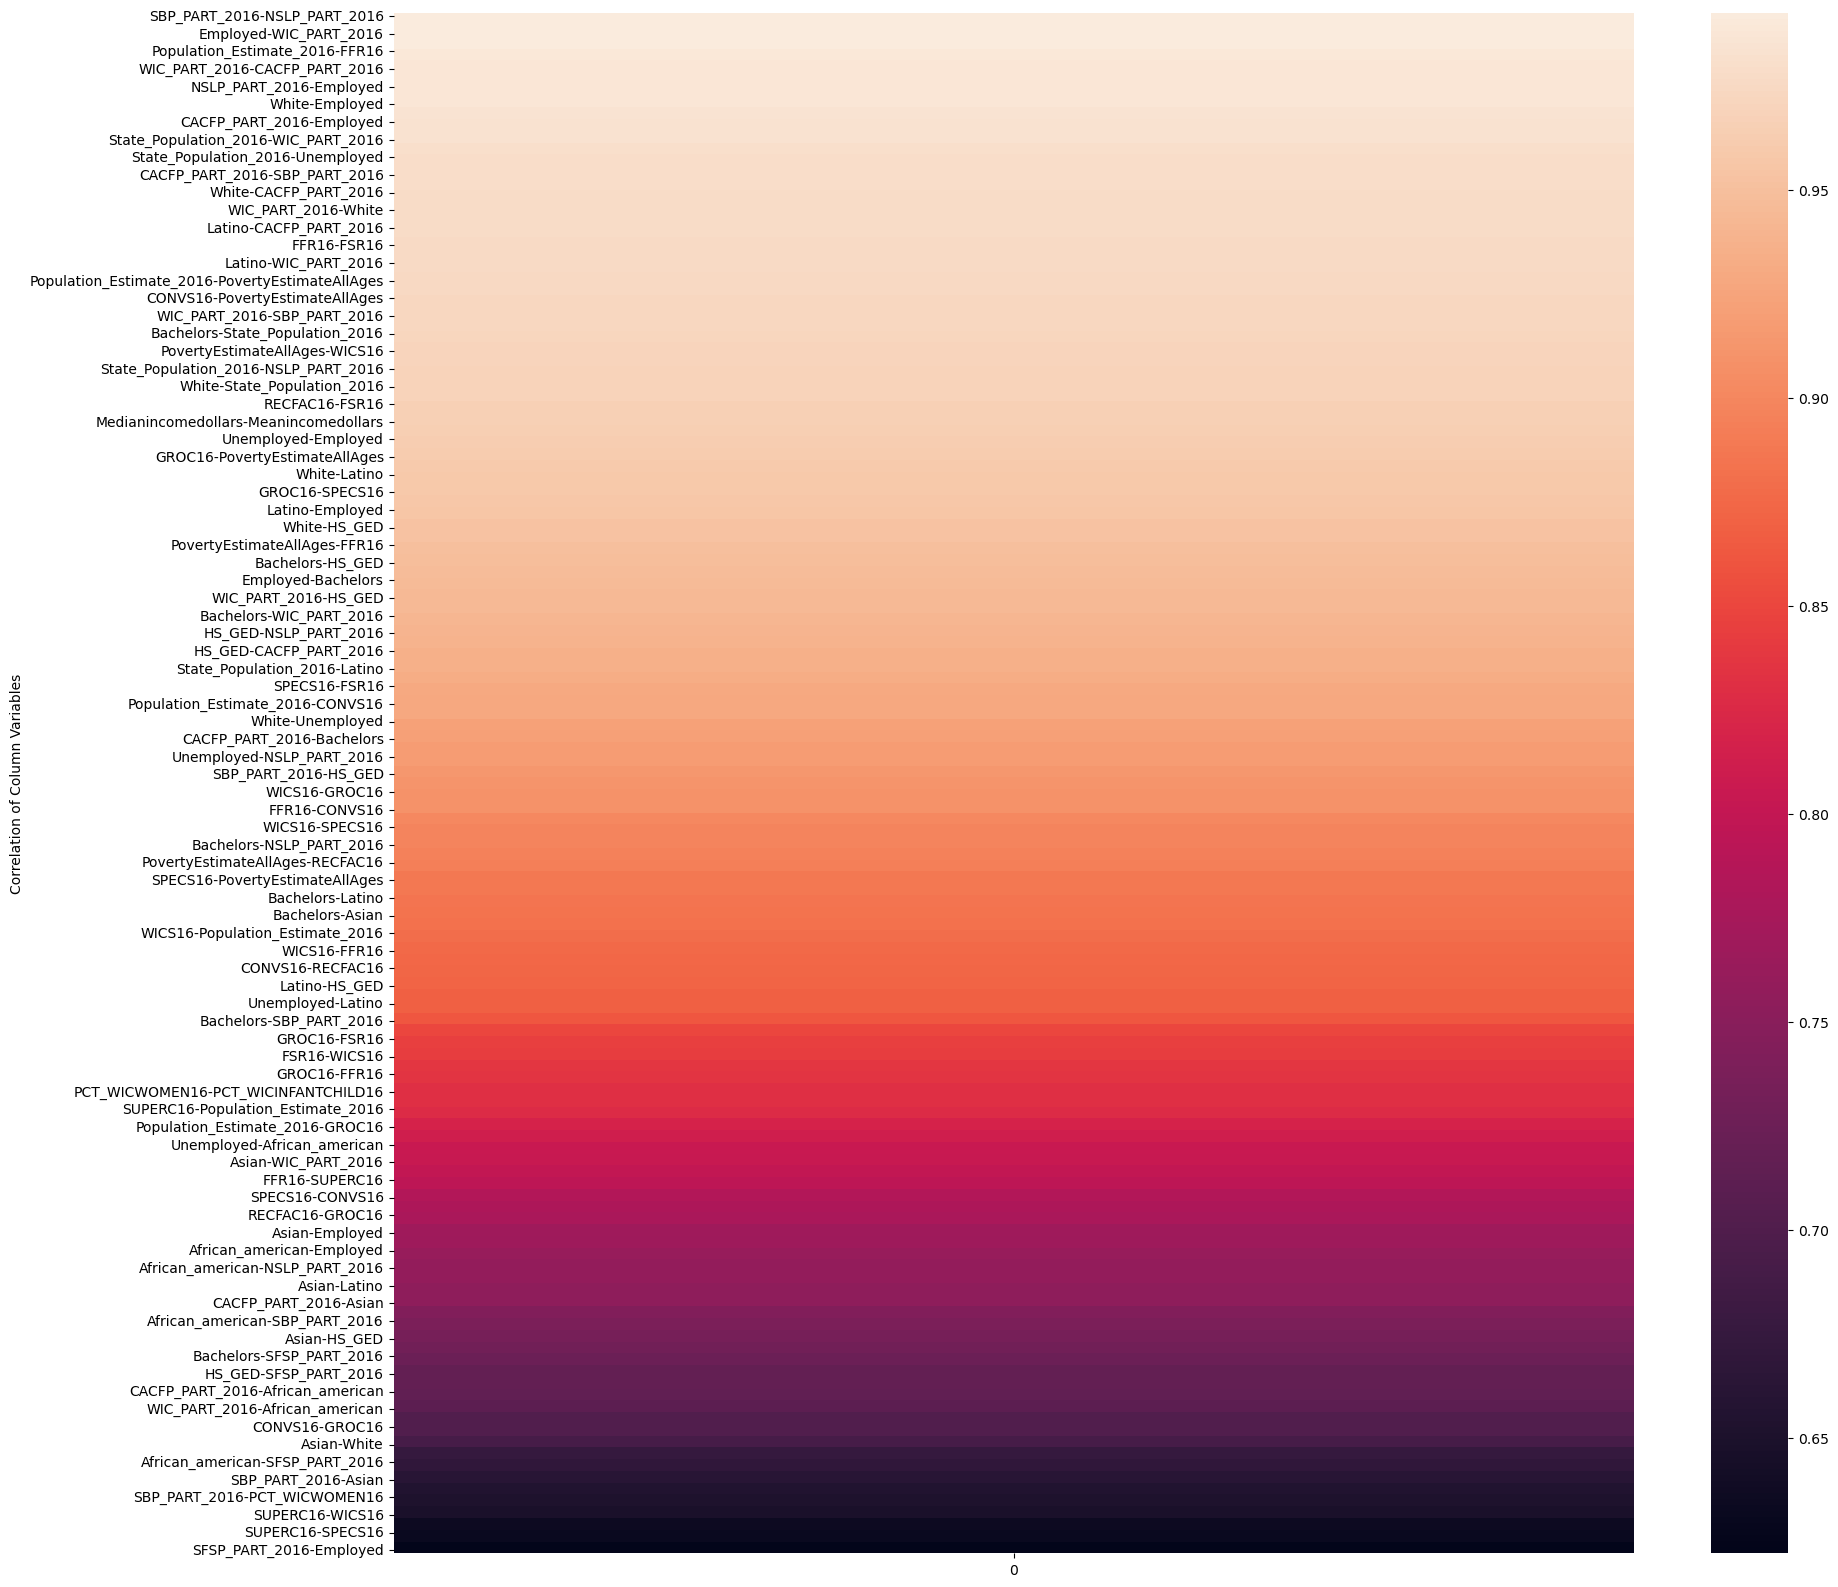

In [16]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(sorted_correlation, annot=False)
plt.ylabel('Correlation of Column Variables')
plt.show()

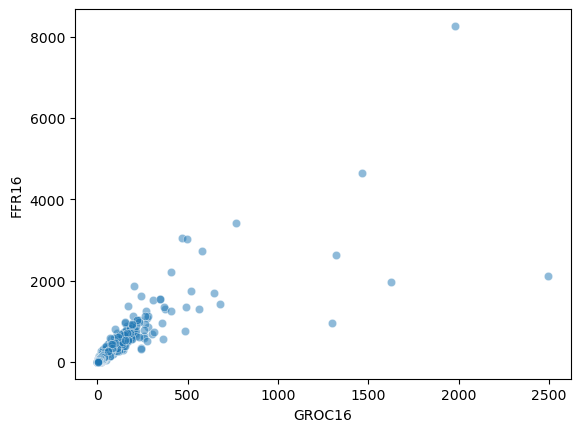

In [26]:
# Plot number of grocery stores against number of fast food restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FFR16', alpha=0.5)
plt.show()

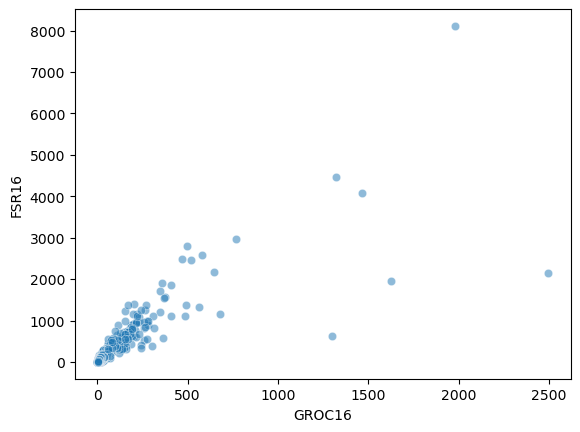

In [25]:
# Plot number of grocery stores against number of full-service restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FSR16', alpha=0.5)
plt.show()

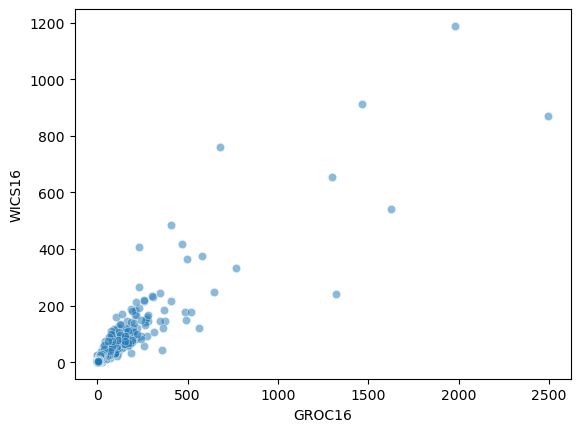

In [24]:
# Plot number of grocery stores against number of WIC-authorized stores
_ = sns.scatterplot(data=df, x='GROC16', y='WICS16', alpha=0.5)
plt.show()